# Perceptron with MinMaxScaler & QuantileTransformer

This Code template is for the Classification task using simple Perceptron where the scaling technique used is MinMaxScaler and transformer used is QuantileTransformer.

### Required Packages

In [ ]:
!pip install imblearn

In [25]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [27]:
#filepath
file_path= ""

List of features which are  required for model training.

In [41]:
#x_values
features=[]

Target feature for prediction.

In [42]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [30]:
df=pd.read_csv(file_path)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [31]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [32]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.


In [33]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

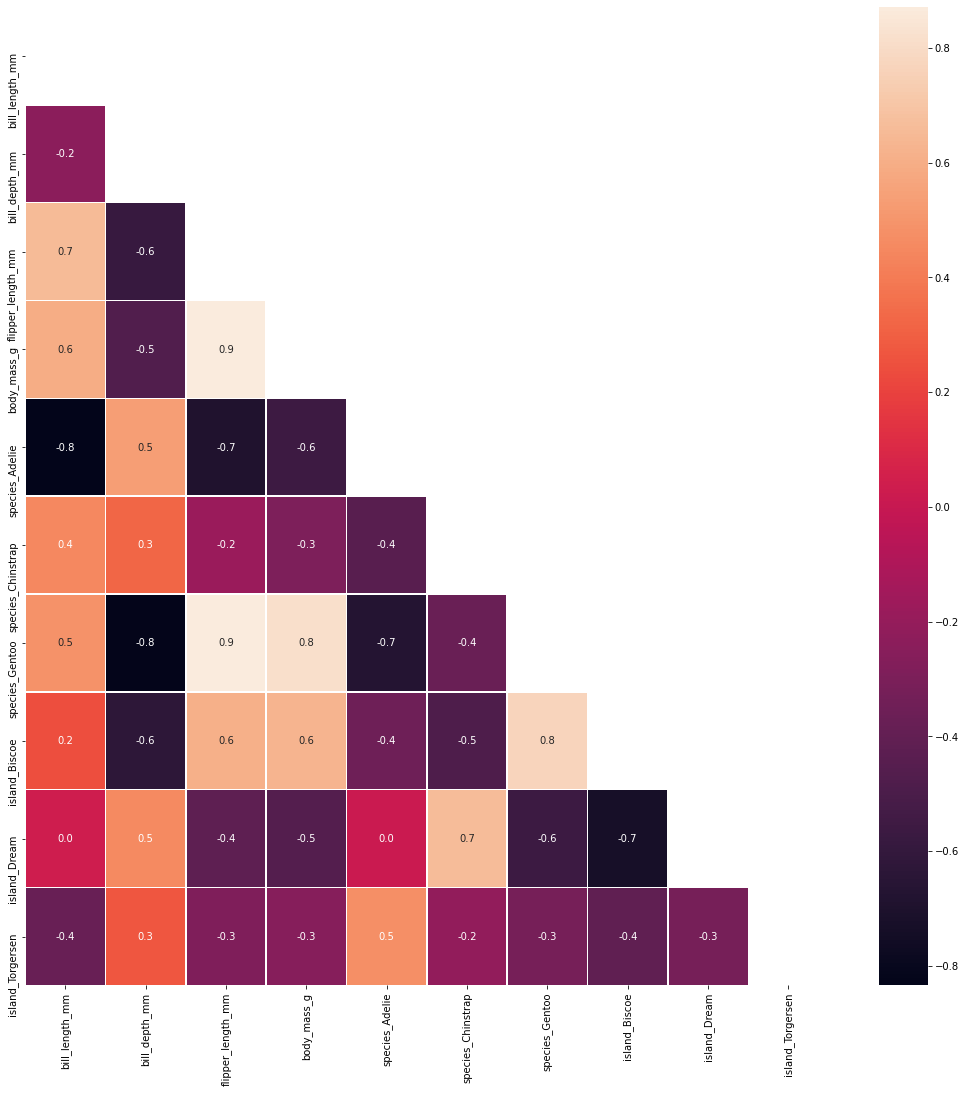

In [34]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Handling Target Imbalance
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [36]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Model

The perceptron is an algorithm for supervised learning of binary classifiers. The algorithm learns the weights for the input signals in order to draw a linear decision boundary.This enables you to distinguish between the two linearly separable classes +1 and -1.


#### Model Tuning Parameters:
**penalty** ->The penalty (aka regularization term) to be used. {‘l2’,’l1’,’elasticnet’}

**alpha** -> Constant that multiplies the regularization term if regularization is used.

**l1_ratio** -> The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty='elasticnet'.

**tol** -> The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).

**early_stopping** -> Whether to use early stopping to terminate training when validation. score is not improving. If set to True, it will automatically set aside a stratified fraction of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs.

**validation_fraction** -> The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

**n_iter_no_change** -> Number of iterations with no improvement to wait before early stopping.

### MinMax Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

### Quantile Transformer

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

[QuantileTransformer API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

In [37]:
model=make_pipeline(MinMaxScaler(), QuantileTransformer(), Perceptron(random_state=123))
model.fit(x_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('perceptron', Perceptron(random_state=123))])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [38]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 75.36 %



### Confusion Matrix
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

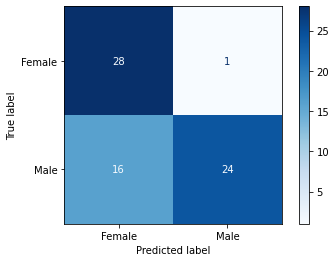

In [39]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)


### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* where:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [40]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

      Female       0.64      0.97      0.77        29
        Male       0.96      0.60      0.74        40

    accuracy                           0.75        69
   macro avg       0.80      0.78      0.75        69
weighted avg       0.82      0.75      0.75        69



#### Creator: Jay Shimpi, Github: [Profile](https://github.com/JayShimpi22)